<a href="https://colab.research.google.com/github/migvanderlei/rna-2-1/blob/main/rna_rosenblatt_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron():
  def __init__(self, entrada, saida, taxa_aprendizado=0.1, range_pesos=(-1, 1), max_epocas=-1, degrau=0.1):
        self.vies = np.negative(np.ones(len(entrada))).reshape(-1,1)
        self.entrada = np.append(self.vies, entrada, axis = 1)
        self.saida = saida
        self.n_atributos = len(self.entrada[0])
        self.pesos = np.random.uniform(range_pesos[0], range_pesos[1], self.n_atributos)
        self.taxa_aprendizado = taxa_aprendizado
        self.max_epocas = max_epocas
        self.degrau = degrau
        self.n_amostras = len(self.entrada)
        self.num_total_ajustes = 0
        self.n_epocas = 0

  def ativacao(self, u):
        return 1 if u >= self.degrau else 0

  def treinar(self):
        print("---- Vetor inicial de pesos: ", self.pesos)
        self.n_epocas = 1
        self.num_total_ajustes = 0

        while True:
            erro = False
            n_ajustes = 0
            print(f"---- Época {self.n_epocas} ----")
            for i in range(self.n_amostras):
                u = 0
                for j in range(self.n_atributos):
                    u+= self.entrada[i][j] * self.pesos[j]
                
                y = self.ativacao(u)

                if y != self.saida[i]:
                    self.num_total_ajustes+=1
                    print("Ajuste: ", self.pesos)
                    n_ajustes += 1

                    erro_aux = self.saida[i] - y

                    for j in range(self.n_atributos):
                        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado * erro_aux * self.entrada[i][j]
                    erro = True
            
            print(f"---- Fim da época {self.n_epocas} com {n_ajustes} ajustes ----")
            
            if self.max_epocas == -1:
              if not erro:
                 break
            elif self.n_epocas >= self.max_epocas:
              break

            self.n_epocas+=1

        print("---- Número total de ajustes: ", self.num_total_ajustes)
        print("---- Número de épocas até a convergência: ", self.n_epocas-1)


# Parte I - Problema linearmente separável

In [ ]:
dataAll = np.fromfile('dataAll.txt').reshape(-1, 3)
entrada = dataAll[: , :2]
saida = dataAll[:,2:]

In [ ]:
p = Perceptron(entrada, saida, range_pesos=(-0.5, 0.5))
p.treinar()

---- Vetor inicial de pesos:  [ 0.48666951 -0.27922488  0.42127272]
---- Época 1 ----
Ajuste:  [ 0.48666951 -0.27922488  0.42127272]
Ajuste:  [  0.58666951  36.09961512 -23.99295728]
Ajuste:  [   0.68666951  -17.55943488 -100.48870728]
Ajuste:  [  0.58666951  55.23658512 -64.65914728]
Ajuste:  [  0.48666951 137.83528512  15.19668272]
Ajuste:  [  0.58666951 143.68104512 -63.09790728]
Ajuste:  [   0.68666951  103.67213512 -140.99059728]
Ajuste:  [  0.78666951 157.34194512 -91.89832728]
Ajuste:  [   0.68666951  104.38188512 -148.76778728]
Ajuste:  [  0.78666951 163.94140512 -98.64545728]
Ajuste:  [   0.68666951  118.41677512 -164.28138728]
Ajuste:  [  0.78666951 209.13263512 -89.56806728]
Ajuste:  [   0.68666951  151.35164512 -149.87621728]
Ajuste:  [   0.58666951  103.08508512 -198.34593728]
Ajuste:  [   0.48666951  173.53243512 -156.22966728]
Ajuste:  [   0.38666951  126.69043512 -207.63953728]
Ajuste:  [   0.28666951  196.55406512 -143.42059728]
Ajuste:  [   0.38666951  140.71833512 -1

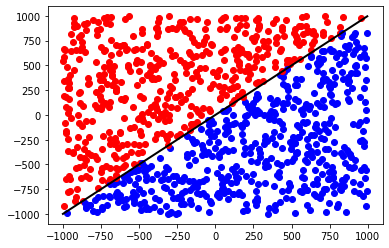

In [ ]:
x = np.arange(min(dataAll[:,:1]),max(dataAll[:,:1]), 0.1)

plt.plot(x, p.pesos[0]/p.pesos[2] - (p.pesos[1]/p.pesos[2] * x), 'k', linewidth=2)

for item in dataAll:
  if item[2] == 0:
    plt.scatter(item[0], item[1], color="red")
  else:
    plt.scatter(item[0], item[1], color="blue")
plt.show()